# Assignment 3
### Group G28:
Bai, Yunming 03722553<br>
Gao, Yue 03725791<br>
Xu, Qinyang 03721948<br>
Zhu, Qiufan 03726330

In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy import exp
import matplotlib.cm as cm
import matplotlib.patches as mpatches

In [2]:
def linear_pca(X, k):
    mu=np.mean(X,axis=1)
    X_c = X-np.expand_dims(mu,axis=1)
    [U,Sigma,VT]=np.linalg.svd(X_c,full_matrices=False)
    #print('first sigular vecotor:{}'.format(VT[0,:]))
    #print('second sigular vector:{}'.format(VT[1,:]))
    S=np.expand_dims(Sigma[:k],axis=1)*VT[:k,:]
    return S

In [3]:
# Insert Code for Subtask 1.1 here
N= 300 #number of samples from each class
data_folder=['d0','d1','d2','d3','d4','d5','d6','d7','d8','d9']
num_classes = len(data_folder)

X=np.zeros((784,num_classes*N))

colors = cm.rainbow(np.linspace(0, 1, num_classes))
C = np.zeros((N* num_classes, 4)) # Color vector

#read image into vector x (X.shape=(784,num_classes*N))
for i,dp in enumerate(data_folder):
    C[i*N:(i+1)*N, :] = colors[i,:]
    for j in range(N):
        X[:,i*N+j]=np.float64(imageio.imread('../Assignment 3/mnist/'+dp+'/'+dp+'_'+'%04d.png'%(j+1)).ravel())

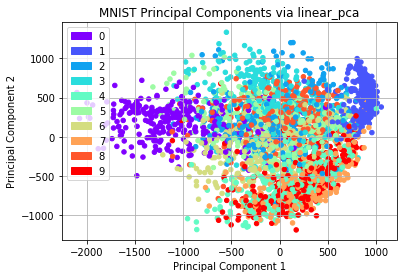

In [4]:
#calculate the first two scores via linear_pca
Score = linear_pca(X,2)

#shuffel the index for visilisation purpose
idx_new = np.arange(N*num_classes)
np.random.shuffle(idx_new)

#plot the result 
plt.scatter(Score[0,idx_new],Score[1,idx_new], c=C[idx_new,:],s=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('MNIST Principal Components via linear_pca')
legend_patch = [mpatches.Patch(color=colors[i], label=str(i)) for i in range(0, num_classes)]
plt.legend(handles=legend_patch)
plt.grid()
plt.show()
    

In [5]:
def gram_pca(K,k):
    # Insert Code for Subtask 1.2 here
    n = K.shape[0];
    Identity = np.identity(n);
    H = Identity - (1/n) * np.dot(np.ones((n,1)),np.ones((1,n)));
    
    #compute centered grammatrix K_c
    K_c = H.dot(K).dot(H);
    
    #eigenvalue decomposition of K_c
    eigenvalue,V = np.linalg.eig(K_c);
    
    ev_diag_k = eigenvalue[:k]; 
    sigularvalue_k = np.sqrt(ev_diag_k);
    
    sigma_k =  np.diag(sigularvalue_k)
    Vk = V[:,:k];
    S = sigma_k.dot(Vk.T)
    #print('first sigular vecotor:{}'.format(Vk[:,0]))
    #print('second sigular vector:{}'.format(Vk[:,1]))
    return S

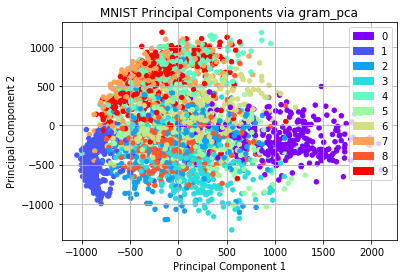

In [7]:
# Insert Code for Subtask 1.3 here

#calculate the first two scores via gram_pca
S_gram = gram_pca(np.dot(X.T,X),k=2)

#shuffel the index for visilisation purpose
idx_new = np.arange(N*num_classes)
np.random.shuffle(idx_new)

#plot the result 
plt.scatter(S_gram[0,idx_new],S_gram[1,idx_new], c=C[idx_new,:],s=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('MNIST Principal Components via gram_pca')
legend_patch = [mpatches.Patch(color=colors[i], label=str(i)) for i in range(0, num_classes)]
plt.legend(handles=legend_patch)
plt.grid()
plt.show()

The results of linear_pca and gram_pca are flipped. The fisrt two sigular vectors V1,V2 of trainingmatrix X have different sign compared with the fisrt two eigenvectors of grammatrix X.T@X. Therefore the results are flipped in terms of the fisrt two principle components. 

In [8]:
def compute_gaussian_gram_matrix(X, sigma):
    #Insert Code for Subtask 1.4 here
    n_Samples = X.shape[1]
    K = np.zeros((n_Samples,n_Samples))
    
    sq_dists = pdist(X.T, 'sqeuclidean')

    # Converting the pairwise distances into a symmetric MxM matrix.
    mat_sq_dists = squareform(sq_dists)

    # Computing the MxM kernel matrix.
    K = exp(-mat_sq_dists/(2*(sigma**2)))
    
    return K

def gaussian_kernel_pca(X, k, sigma):
    K=compute_gaussian_gram_matrix(X,sigma)
    S=gram_pca(K,k)
    return S

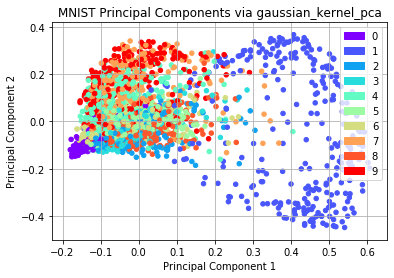

In [9]:
#Insert Code for Subtask 1.5 here
#calculate the first two scores via gaussian_kernel_pca
Score_gaussian = gaussian_kernel_pca(X, k=2, sigma=1000)

#shuffel the index for visilisation purpose
idx_new = np.arange(N*num_classes)
np.random.shuffle(idx_new)

#plot the result 
plt.scatter(Score_gaussian[0,idx_new],Score_gaussian[1,idx_new], c=C[idx_new,:],s=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('MNIST Principal Components via gaussian_kernel_pca')
legend_patch = [mpatches.Patch(color=colors[i], label=str(i)) for i in range(0, num_classes)]
plt.legend(handles=legend_patch)
plt.grid()
plt.show()